# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [37]:
library('tidyverse')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [19]:
df.measles=read_csv('measles.csv')

Rows: 66113 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): state, year, name, type, city, county
dbl (8): index, enroll, mmr, overall, xmed, xper, lat, lng
lgl (2): district, xrel

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [20]:
# create the df_vacc_rates here
df.measles |>
    filter(mmr>=0) |>
    group_by(state) |>
    summarize(N=n(), mmr>=95,na.rm=TRUE, N95= sum(mmr>=95)) |>
    mutate(frac_N95=N95/N)|>
    head()


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


state,N,mmr >= 95,na.rm,N95,frac_N95
<chr>,<int>,<lgl>,<lgl>,<int>,<dbl>
Arizona,1171,TRUE,TRUE,593,0.5064048
Arizona,1171,TRUE,TRUE,593,0.5064048
Arizona,1171,TRUE,TRUE,593,0.5064048
Arizona,1171,TRUE,TRUE,593,0.5064048
Arizona,1171,TRUE,TRUE,593,0.5064048
Arizona,1171,TRUE,TRUE,593,0.5064048


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [21]:
#ARKANSAS
df.measles |>
    filter(mmr>=0) |>
    group_by(state) |>
    summarize(N=n(), mmr>=95,na.rm=TRUE, N95= sum(mmr>=95)) |>
    mutate(frac_N95=N95/N)|>
    arrange(frac_N95) |>
    head()

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'state'. You can override using the
`.groups` argument.


state,N,mmr >= 95,na.rm,N95,frac_N95
<chr>,<int>,<lgl>,<lgl>,<int>,<dbl>
Arkansas,567,TRUE,TRUE,2,0.003527337
Arkansas,567,TRUE,TRUE,2,0.003527337
Arkansas,567,FALSE,TRUE,2,0.003527337
Arkansas,567,FALSE,TRUE,2,0.003527337
Arkansas,567,FALSE,TRUE,2,0.003527337
Arkansas,567,FALSE,TRUE,2,0.003527337


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

In [53]:
library('ggrepel')
df.measles |>
   filter(state=="North Carolina") |>
    mutate(ecdf_y=cume_dist(overall)) |>
    summarize(state,ecdf_y, overall) |>
  
    head()


Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


state,ecdf_y,overall
<chr>,<dbl>,<dbl>
North Carolina,1,100
North Carolina,1,100
North Carolina,1,100
North Carolina,1,100
North Carolina,1,100
North Carolina,1,100


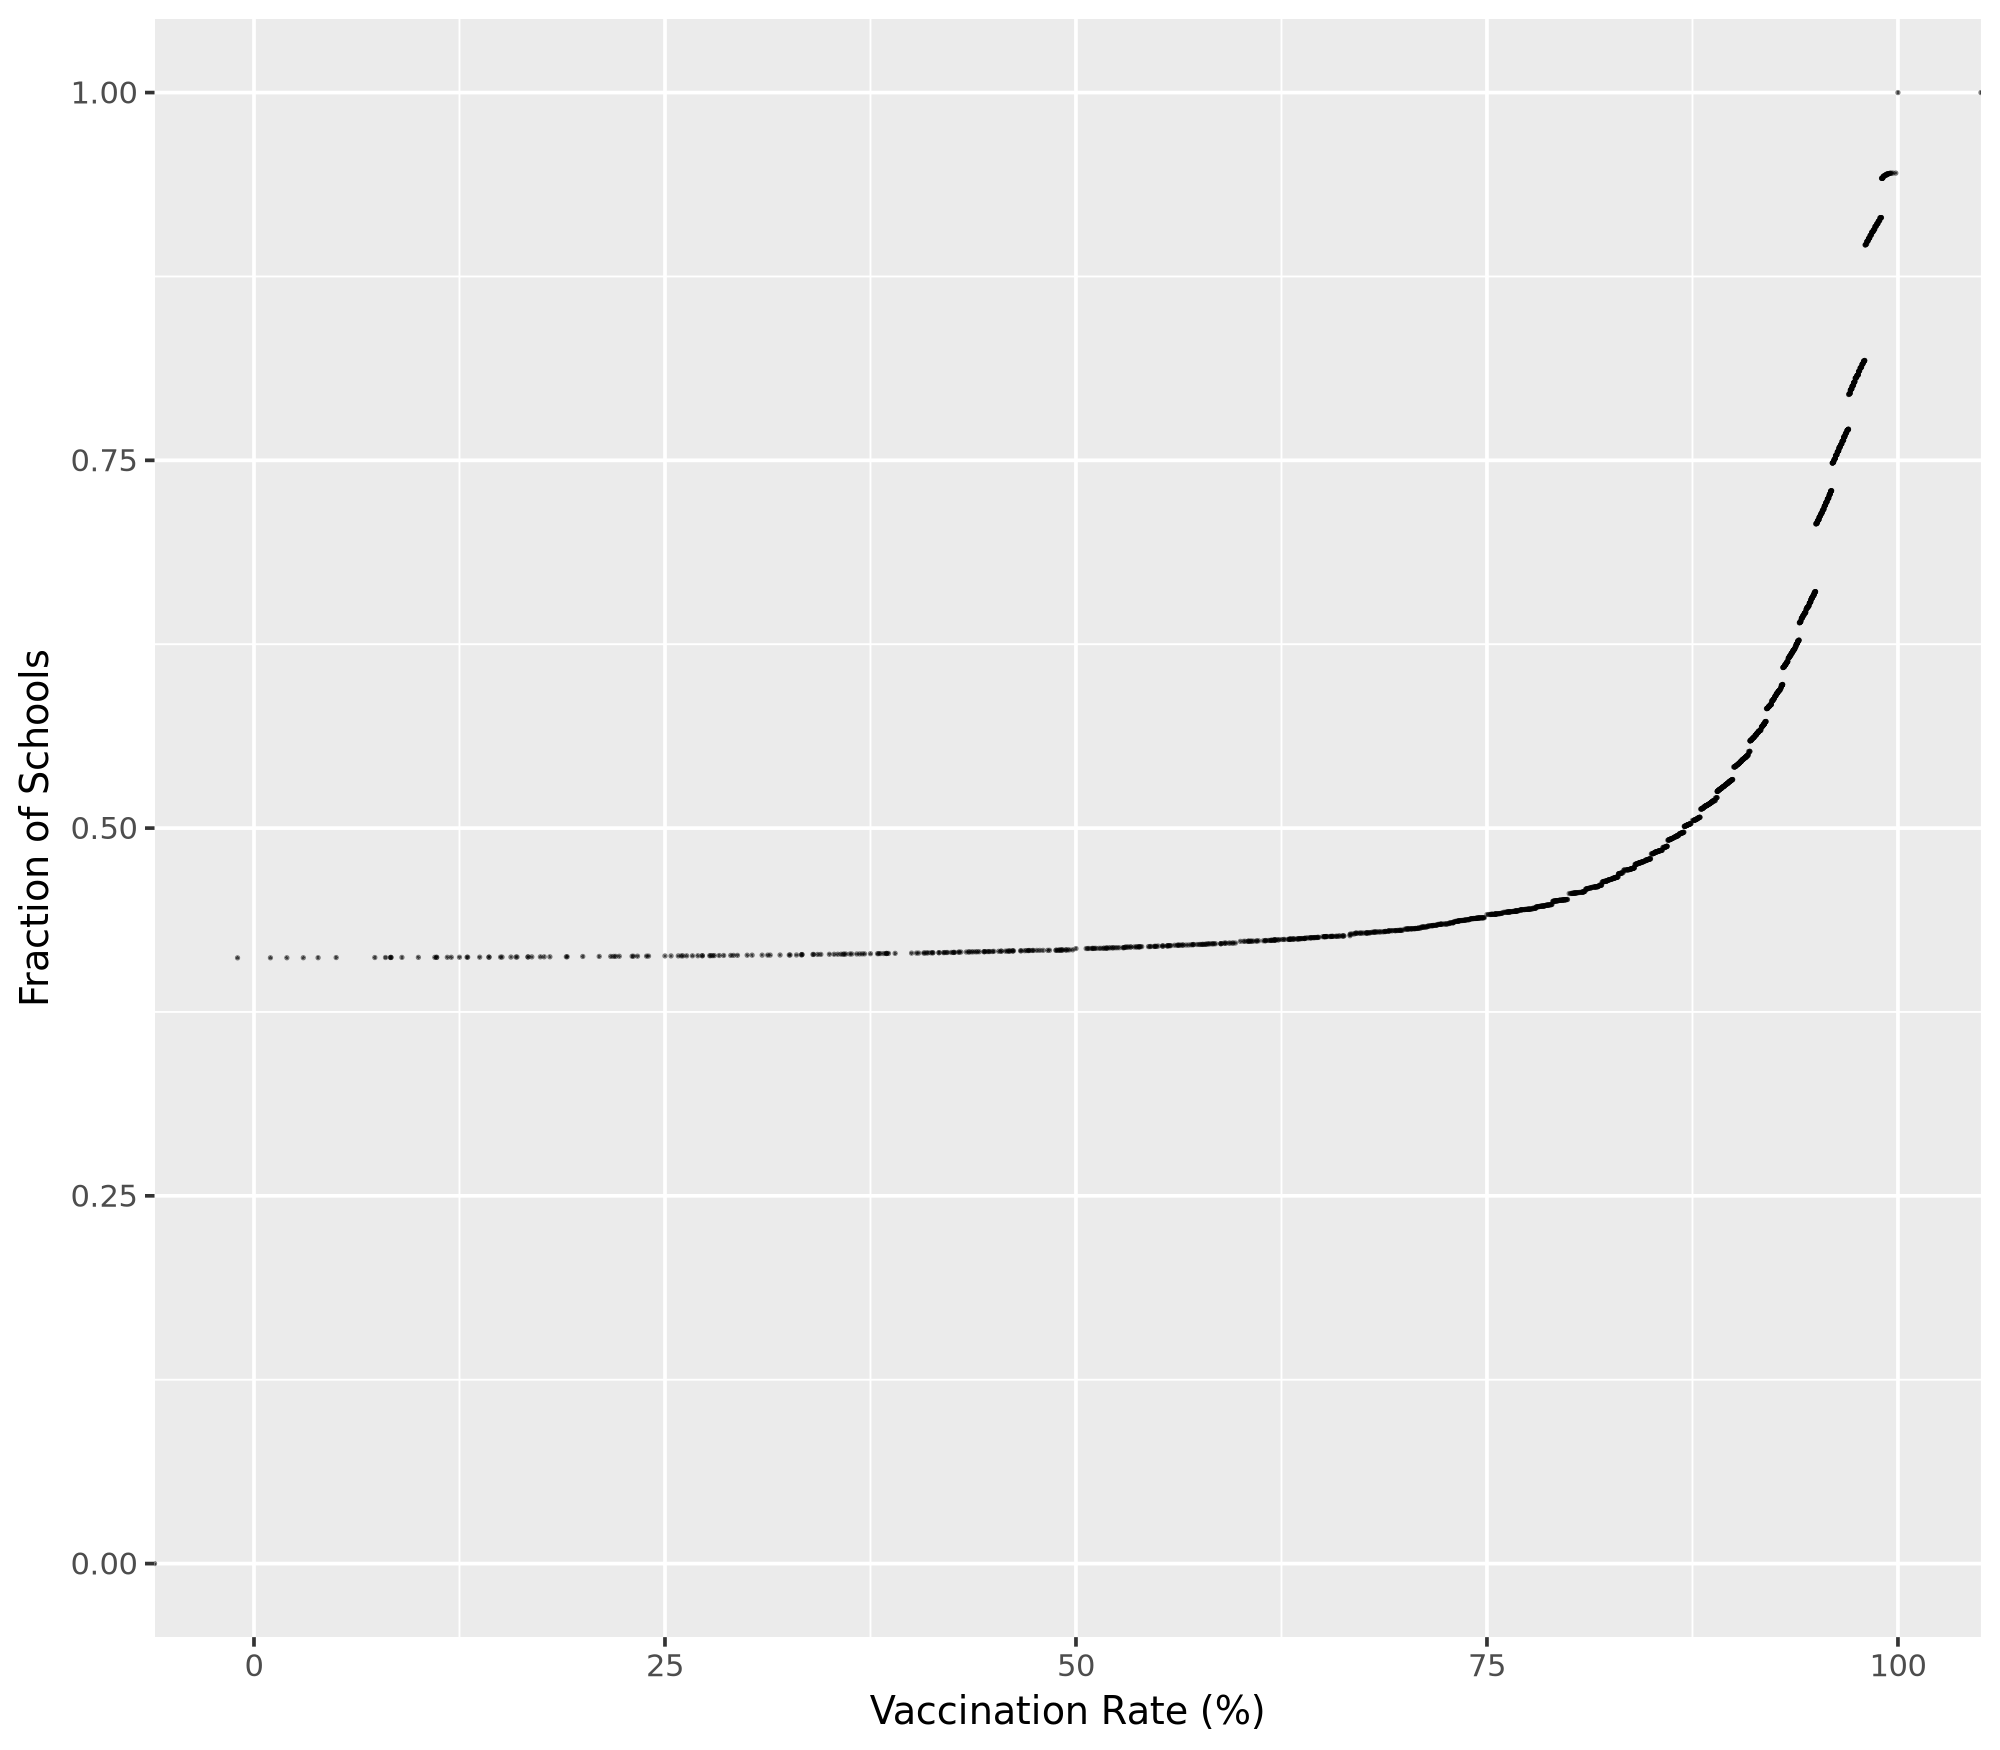

In [44]:
options(repr.plot.width=8)
   
ggplot(df.measles, aes(x=overall)) + 
    stat_ecdf(geom="point", size=0.05, alpha=0.5) +
    labs(x='Vaccination Rate (%)', y="Fraction of Schools")


    

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [54]:
#YES
df.measles |>
   filter(state=="North Carolina") |>
   summarize(state, median.vax.rate=median(overall))
    head()
  

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”


state,median.vax.rate
<chr>,<dbl>
North Carolina,100
North Carolina,100
North Carolina,100
North Carolina,100
North Carolina,100
North Carolina,100
North Carolina,100
North Carolina,100
North Carolina,100


ERROR: Error in head.default(): argument "x" is missing, with no default
